<a href="https://www.kaggle.com/code/noblekurian/corona-california?scriptVersionId=130036714" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-variant-data/covid19_variant.csv


# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Corona-California</p>

The California Department of Public Health (CDPH) is identifying ​the prevalence of circulating SARS-CoV-2 variants by analysing ​CDPH Genomic Surveillance Data and ​CalREDIE, CDPH's communicable disease reporting and surveillance system. Viruses mutate into new strains or variants over time. Some variants emerge and then disappear. Other variants become common and circulate for a long time. Several specialized laboratories state-wide sequence the genomes of a fraction of all positive COVID-19 tests to determine which variants are circulating. Sequencing and reporting of variant results takes several days after a test is identified as a positive for COVID-19. Not all ​viruses from positive COVID-19 tests are ​sequenced. Knowing what variants are circulating in California informs public health and clinical action.

# **Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the Dataset**

In [3]:
df=pd.read_csv('/kaggle/input/covid-19-variant-data/covid19_variant.csv')
df.head(50)

,date,area,area_type,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg
0,01-01-2021,California,State,Alpha,1,1.69,NaN,NaN
1,01-01-2021,California,State,Lambda,0,0.00,NaN,NaN
2,01-01-2021,California,State,Other,29,49.15,NaN,NaN
3,01-01-2021,California,State,Epsilon,28,47.46,NaN,NaN
4,01-01-2021,California,State,Omicron,1,1.69,NaN,NaN
5,01-01-2021,California,State,Beta,0,0.00,NaN,NaN
6,01-01-2021,California,State,Total,59,100.00,NaN,NaN
7,01-01-2021,California,State,Delta,0,0.00,NaN,NaN
8,01-01-2021,California,State,Mu,0,0.00,NaN,NaN
9,01-01-2021,California,State,Gamma,0,0.00,NaN,NaN


 <p style="background-color:#752F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA ANALYSIS</p>

In [4]:
df.describe()

,specimens,percentage,specimens_7d_avg,percentage_7d_avg
count,7790.000000,7790.000000,7730.000000,7730.000000
mean,177.596919,20.000004,178.622731,20.000000
std,485.649656,37.925758,449.876303,37.927537
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.142857,0.013672
75%,28.000000,7.380000,27.857143,7.414083
max,5802.000000,100.000000,3295.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7790 entries, 0 to 7789
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               7790 non-null   object 
 1   area               7790 non-null   object 
 2   area_type          7790 non-null   object 
 3   variant_name       7790 non-null   object 
 4   specimens          7790 non-null   int64  
 5   percentage         7790 non-null   float64
 6   specimens_7d_avg   7730 non-null   float64
 7   percentage_7d_avg  7730 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 487.0+ KB


In [6]:
df.isnull().value_counts()

date   area   area_type  variant_name  specimens  percentage  specimens_7d_avg  percentage_7d_avg
False  False  False      False         False      False       False             False                7730
                                                              True              True                   60
dtype: int64

#  <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>

By looking at the data we could find out that the NaN valaues are repeating around 30 times in the columns called **"specimens_7d_avg","percentage_7d_avg"**.So fill the values with 0.

In [7]:
df=df.fillna(0)
df.head()

,date,area,area_type,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg
0,01-01-2021,California,State,Alpha,1,1.69,0.0,0.0
1,01-01-2021,California,State,Lambda,0,0.00,0.0,0.0
2,01-01-2021,California,State,Other,29,49.15,0.0,0.0
3,01-01-2021,California,State,Epsilon,28,47.46,0.0,0.0
4,01-01-2021,California,State,Omicron,1,1.69,0.0,0.0


In [8]:
df.shape

(7790, 8)

Create a temporary dataframe to look at the values of each variant.

In [9]:
temp_df=df.groupby(['date','variant_name'])['specimens'].value_counts()
temp_df.head(30)

date        variant_name  specimens
01-01-2021  Alpha         1            1
            Beta          0            1
            Delta         0            1
            Epsilon       28           1
            Gamma         0            1
            Lambda        0            1
            Mu            0            1
            Omicron       1            1
            Other         29           1
            Total         59           1
01-01-2022  Alpha         0            1
            Beta          0            1
            Delta         37           1
            Epsilon       0            1
            Gamma         0            1
            Lambda        0            1
            Mu            0            1
            Omicron       558          1
            Other         3            1
            Total         598          1
01-01-2023  Alpha         0            1
            Beta          0            1
            Delta         0            1
            Epsilon  

By looking at each dates not all variants are repeating.So keep the variants that is occuring per day. So remove the others.

In [10]:
new_df=df[df['specimens']!=0]
new_df

,date,area,area_type,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg
0,01-01-2021,California,State,Alpha,1,1.69,0.000000,0.000000
2,01-01-2021,California,State,Other,29,49.15,0.000000,0.000000
3,01-01-2021,California,State,Epsilon,28,47.46,0.000000,0.000000
4,01-01-2021,California,State,Omicron,1,1.69,0.000000,0.000000
6,01-01-2021,California,State,Total,59,100.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...
7777,17-02-2023,California,State,Other,2,5.00,1.000000,1.051051
7778,17-02-2023,California,State,Omicron,38,95.00,94.142857,98.948949
7784,18-02-2023,California,State,Total,37,100.00,90.000000,100.000000
7787,18-02-2023,California,State,Omicron,36,97.30,88.857143,98.730159


**CREATING THE COPY**

In [11]:
df1=new_df.copy()

In [12]:
df1

,date,area,area_type,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg
0,01-01-2021,California,State,Alpha,1,1.69,0.000000,0.000000
2,01-01-2021,California,State,Other,29,49.15,0.000000,0.000000
3,01-01-2021,California,State,Epsilon,28,47.46,0.000000,0.000000
4,01-01-2021,California,State,Omicron,1,1.69,0.000000,0.000000
6,01-01-2021,California,State,Total,59,100.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...
7777,17-02-2023,California,State,Other,2,5.00,1.000000,1.051051
7778,17-02-2023,California,State,Omicron,38,95.00,94.142857,98.948949
7784,18-02-2023,California,State,Total,37,100.00,90.000000,100.000000
7787,18-02-2023,California,State,Omicron,36,97.30,88.857143,98.730159


Converting the date to timestamp mode

In [13]:
df1['date']=pd.to_datetime(df1['date'])

By looking at the data the row named '**Total**' occurs in each week which can affect on other operations in the data.So removes it.

In [14]:
df1.set_index('variant_name',inplace=True)

In [15]:
df1

,date,area,area_type,specimens,percentage,specimens_7d_avg,percentage_7d_avg
variant_name,,,,,,,
Alpha,2021-01-01,California,State,1,1.69,0.000000,0.000000
Other,2021-01-01,California,State,29,49.15,0.000000,0.000000
Epsilon,2021-01-01,California,State,28,47.46,0.000000,0.000000
Omicron,2021-01-01,California,State,1,1.69,0.000000,0.000000
Total,2021-01-01,California,State,59,100.00,0.000000,0.000000
...,...,...,...,...,...,...,...
Other,2023-02-17,California,State,2,5.00,1.000000,1.051051
Omicron,2023-02-17,California,State,38,95.00,94.142857,98.948949
Total,2023-02-18,California,State,37,100.00,90.000000,100.000000


In [16]:
df1=df1.drop('Total',axis=0)

In [17]:
df1['Year']=df1['date'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df1.reset_index(inplace=True)

In [19]:
x=df1['variant_name'].unique()
x

array(['Alpha', 'Other', 'Epsilon', 'Omicron', 'Delta', 'Gamma', 'Mu',
       'Beta', 'Lambda'], dtype=object)

In [20]:
r=df1.groupby('variant_name').sum()
r

,specimens,percentage,specimens_7d_avg,percentage_7d_avg,Year
variant_name,,,,,
Alpha,16421,5266.31,16377.142857,5172.085046,493124
Beta,170,46.71,121.000000,33.175840,145512
Delta,241607,18315.14,241552.857139,18276.237012,723577
Epsilon,24926,5888.22,24315.142857,5737.092977,377929
Gamma,3698,1078.26,3656.714286,1054.696112,398144
Lambda,177,48.89,118.571429,29.921767,169764
Mu,1146,151.49,1112.142857,139.323858,244541
Omicron,383122,42502.04,382826.142855,42243.257546,1079677
Other,20473,4602.97,19745.571429,4505.051616,1384752


#  <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA VISUALIZATION</p>

# Visualization of Total Specimens in each VARIANTS

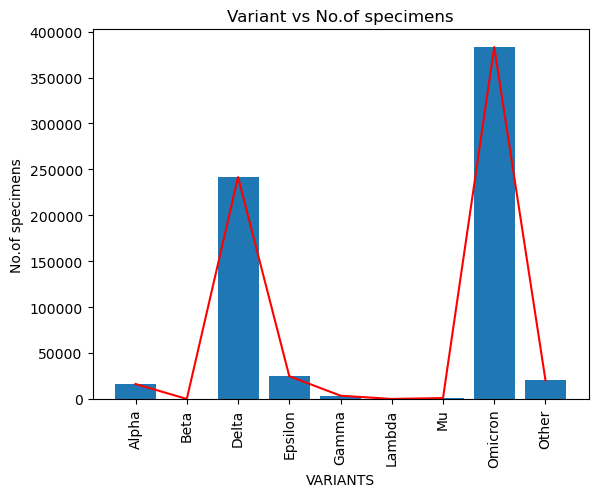

In [21]:
xpos=[g for g,df in df1.groupby(['variant_name'])]

plt.bar(xpos,r['specimens'])
plt.xticks(xpos,rotation='vertical')
plt.plot(xpos,r['specimens'],color='r')
plt.xlabel('VARIANTS')
plt.ylabel('No.of specimens')
plt.title('Variant vs No.of specimens')
plt.show()


# Visualization of Total Specimens in each VARIANTS respective to the Year

In [22]:
l=df1.groupby(['Year','variant_name']).sum()#['specimens'].sum()
l

specimens  percentage  specimens_7d_avg  percentage_7d_avg
Year variant_name                                                            
2021 Alpha             16421     5266.31      16377.142857        5172.085046
     Beta                170       46.71        121.000000          33.175840
     Delta            240874    18270.07     240408.142853       18220.257644
     Epsilon           24924     5887.98      24314.857143        5737.065007
     Gamma              3688     1077.02       3654.428571        1054.410687
     Lambda              177       48.89        118.571429          29.921767
     Mu                 1146      151.49       1112.142857         139.323858
     Omicron           36315     1409.06      29606.999999        1154.788460
     Other             18734     4342.47      18132.571429        4288.627266
2022 Delta               733       45.07       1144.714286          55.979368
     Epsilon               2        0.24          0.285714           0.027970
     Gamma                10        1.24          2.285714           0.285425
     Omicron          334514    36240.13     338836.571427       36230.045640
     Other              1647      213.35       1550.571429         188.921005
2023 Omicron           12293     4852.85      14382.571429        4858.423447
     Other                92       47.15         62.428571          27.503345

Text(0.5, 1.0, 'Varients in each year')

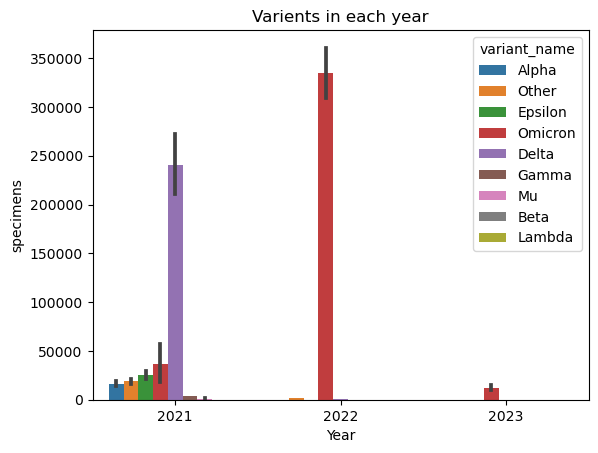

In [23]:
sns.barplot(data=df1,x='Year',y='specimens',hue='variant_name',estimator='sum')
plt.title('Varients in each year')

# Visualization of Total Specimens in each Month respective to the Year

In [24]:
df1['Month']=df1['date'].dt.month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
month_df=df1.groupby(['Year','Month']).sum()
month_df

specimens  percentage  specimens_7d_avg  percentage_7d_avg
Year Month                                                            
2021 1          18207     3099.97      17702.142857        2993.437560
     2          16221     2800.04      14990.714287        2696.197543
     3          19057     3099.88      18533.428571        2995.399613
     4          17770     3000.04      16248.285714        2895.352295
     5          13732     3100.04      13941.428571        2982.345755
     6          16076     3000.03      15048.428571        2891.337219
     7          52162     3100.01      47193.142856        3096.535676
     8          37237     3100.01      42256.428573        3094.532958
     9          30855     3000.00      29311.428571        2995.519455
     10         32984     3099.99      32232.999999        3094.129758
     11         29765     2999.99      31472.857141        2996.846141
     12         58383     3100.00      54914.571428        3098.021601
2022 1          44257     3099.97      40521.857143        3098.577619
     2          30795     2800.02      37093.428570        2798.213268
     3          19134     3100.00      18746.000000        3097.014185
     4          23739     3000.01      23083.714285        2997.436158
     5          29297     3100.01      30949.714285        3099.377817
     6          31171     3000.00      29294.428573        2998.175363
     7          37194     3100.00      37252.428572        3099.120144
     8          28104     3099.99      29167.428572        3099.570920
     9          21797     3000.00      23007.000000        2997.999693
     10         18117     3100.02      18919.714284        3095.526095
     11         25875     3000.00      24756.857142        2996.795577
     12         27426     3100.01      28741.857143        3097.452570
2023 1           4211     2100.00       5753.428572        2094.246077
     2           1534      800.00       1586.428571         797.391578
     3           1011      200.00        870.571429         199.345336
     4            784      200.00        775.714286         200.000000
     5            767      200.00        723.571429         198.956003
     6            675      200.00        698.000000         199.632665
     7            491      200.00        709.285714         200.000000
     8            544      200.00        744.285714         199.611097
     9            744      200.00        716.571429         200.000000
     10           611      200.00        659.428571         200.000000
     11           580      200.00        627.714286         198.484848
     12           433      200.00        580.000000         198.259188

<AxesSubplot:xlabel='Year', ylabel='specimens'>

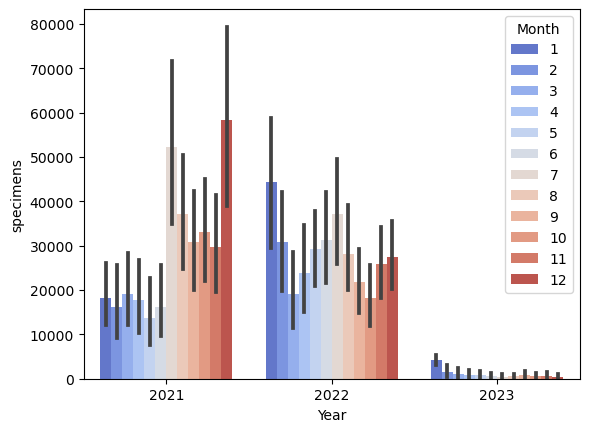

In [26]:
sns.barplot(data=df1,x='Year',y='specimens',hue='Month',estimator='sum',palette='coolwarm')

# Visualization of Total Specimens in each month  respective to the Varinats and Year

In [27]:
df1['Monthandyear']=df1['date'].dt.to_period('M')
df1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,variant_name,date,area,area_type,specimens,percentage,specimens_7d_avg,percentage_7d_avg,Year,Month,Monthandyear
0,Alpha,2021-01-01,California,State,1,1.69,0.0,0.0,2021,1,2021-01
1,Other,2021-01-01,California,State,29,49.15,0.0,0.0,2021,1,2021-01
2,Epsilon,2021-01-01,California,State,28,47.46,0.0,0.0,2021,1,2021-01
3,Omicron,2021-01-01,California,State,1,1.69,0.0,0.0,2021,1,2021-01
4,Alpha,2021-02-01,California,State,6,5.56,0.0,0.0,2021,2,2021-02


In [28]:
month_df=df1.groupby(['Year','Month','variant_name']).sum()
month_df

specimens  percentage  specimens_7d_avg  \
Year Month variant_name                                            
2021 1     Alpha               773      315.12        718.000000   
           Beta                 10        3.34          7.428571   
           Delta              7956      599.84       7593.857143   
           Epsilon            5740     1372.89       5464.571428   
           Gamma               122       35.39        117.142857   
...                            ...         ...               ...   
2023 10    Other                11        6.64          5.857143   
     11    Omicron             576      199.21        625.000000   
           Other                 4        0.79          2.714286   
     12    Omicron             432      199.74        577.857143   
           Other                 1        0.26          2.142857   

                         percentage_7d_avg  
Year Month variant_name                     
2021 1     Alpha                222.268765  
           Beta                   2.097356  
           Delta                585.018642  
           Epsilon             1286.986235  
           Gamma                 34.475766  
...                                    ...  
2023 10    Other                  2.389860  
     11    Omicron              197.895518  
           Other                  0.589330  
     12    Omicron              197.766415  
           Other                  0.492773  

[173 rows x 4 columns]

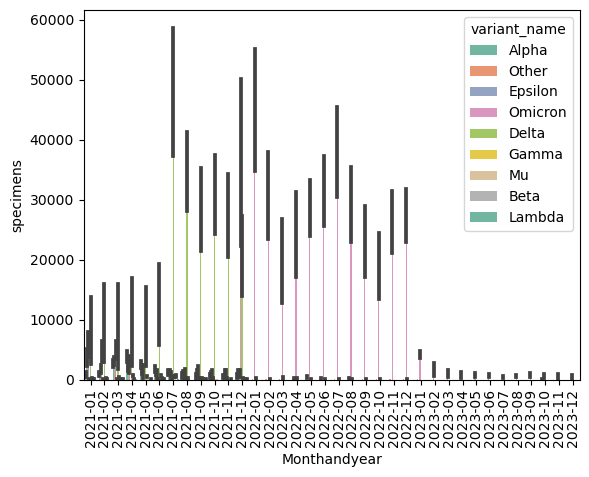

In [29]:
#plt.figure(figsize=(200,100))
sns.barplot(data=df1 ,x='Monthandyear',y='specimens',hue='variant_name',estimator='sum',palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

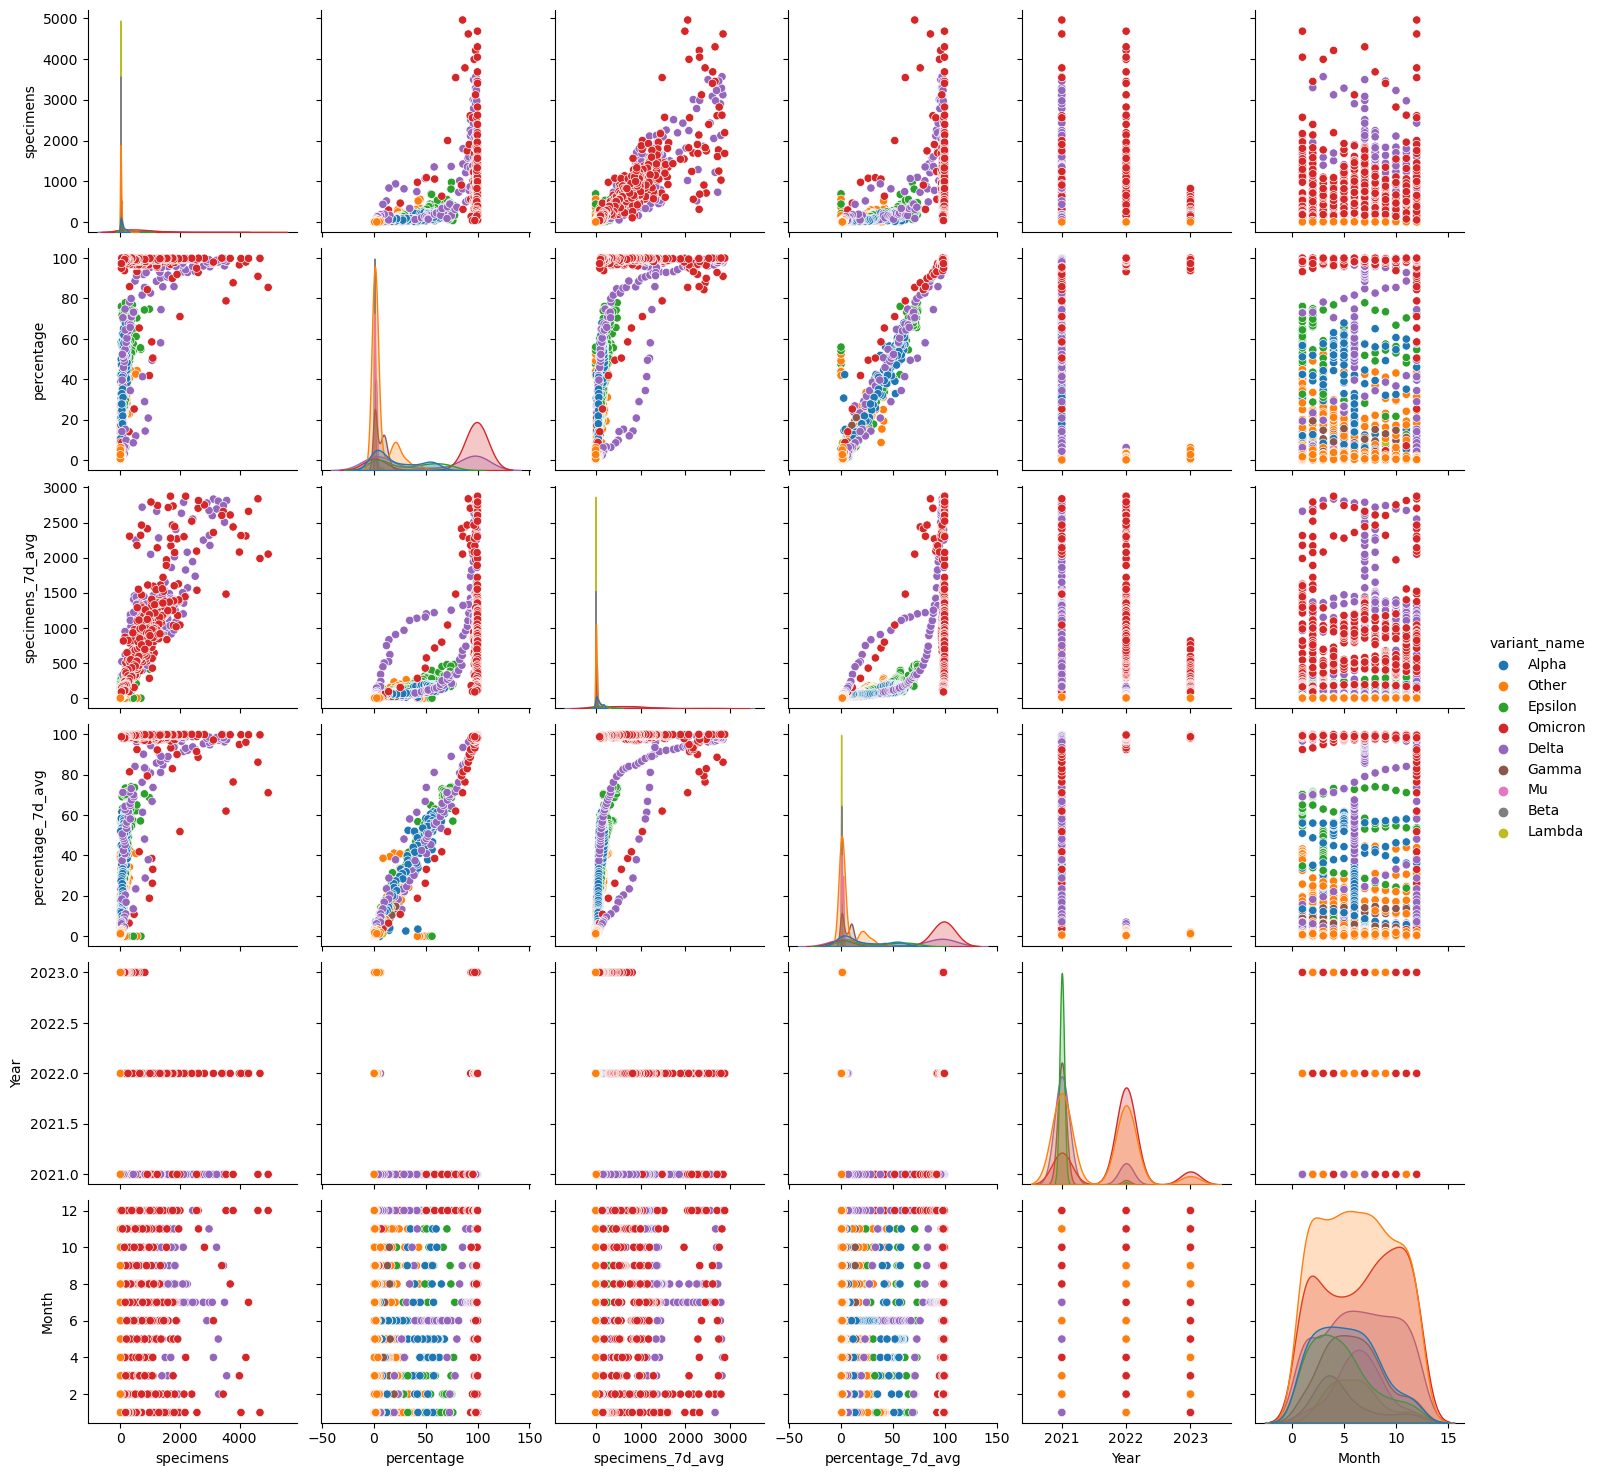

In [30]:
sns.pairplot(data=df1,hue='variant_name')

<AxesSubplot:>

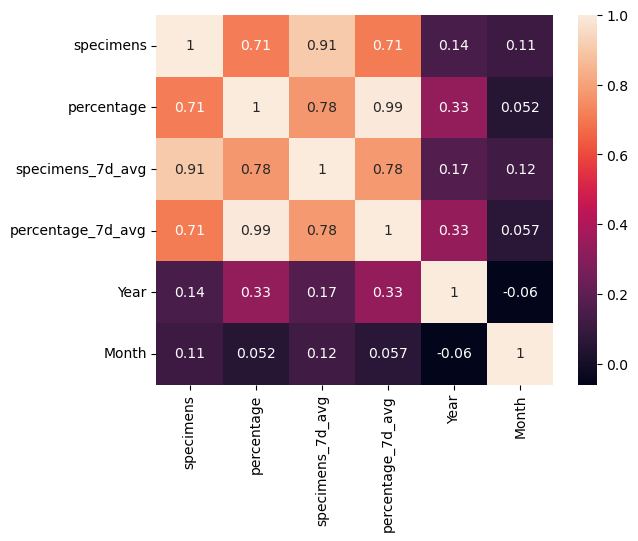

In [31]:
sns.heatmap(df1.corr(),annot=True)

In [32]:
df1.groupby(['variant_name','Year']).sum().reset_index()

,variant_name,Year,specimens,percentage,specimens_7d_avg,percentage_7d_avg,Month
0,Alpha,2021,16421,5266.31,16377.142857,5172.085046,1288
1,Beta,2021,170,46.71,121.000000,33.175840,358
2,Delta,2021,240874,18270.07,240408.142853,18220.257644,2113
3,Delta,2022,733,45.07,1144.714286,55.979368,233
4,Epsilon,2021,24924,5887.98,24314.857143,5737.065007,872
5,Epsilon,2022,2,0.24,0.285714,0.027970,14
6,Gamma,2021,3688,1077.02,3654.428571,1054.410687,1102
7,Gamma,2022,10,1.24,2.285714,0.285425,57
8,Lambda,2021,177,48.89,118.571429,29.921767,517
9,Mu,2021,1146,151.49,1112.142857,139.323858,778


In [33]:
df1.head()

,variant_name,date,area,area_type,specimens,percentage,specimens_7d_avg,percentage_7d_avg,Year,Month,Monthandyear
0,Alpha,2021-01-01,California,State,1,1.69,0.0,0.0,2021,1,2021-01
1,Other,2021-01-01,California,State,29,49.15,0.0,0.0,2021,1,2021-01
2,Epsilon,2021-01-01,California,State,28,47.46,0.0,0.0,2021,1,2021-01
3,Omicron,2021-01-01,California,State,1,1.69,0.0,0.0,2021,1,2021-01
4,Alpha,2021-02-01,California,State,6,5.56,0.0,0.0,2021,2,2021-02


In [34]:
df2=df1[df1.Year==2021]
df2.groupby('variant_name')['specimens'].sum()

variant_name
Alpha       16421
Beta          170
Delta      240874
Epsilon     24924
Gamma        3688
Lambda        177
Mu           1146
Omicron     36315
Other       18734
Name: specimens, dtype: int64

In [35]:
v=df2.groupby(['variant_name']).sum().reset_index()#['specimens'].sum()
v

,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg,Year,Month
0,Alpha,16421,5266.31,16377.142857,5172.085046,493124,1288
1,Beta,170,46.71,121.000000,33.175840,145512,358
2,Delta,240874,18270.07,240408.142853,18220.257644,604279,2113
3,Epsilon,24924,5887.98,24314.857143,5737.065007,373885,872
4,Gamma,3688,1077.02,3654.428571,1054.410687,383990,1102
5,Lambda,177,48.89,118.571429,29.921767,169764,517
6,Mu,1146,151.49,1112.142857,139.323858,244541,778
7,Omicron,36315,1409.06,29606.999999,1154.788460,242520,1020
8,Other,18734,4342.47,18132.571429,4288.627266,707350,2250


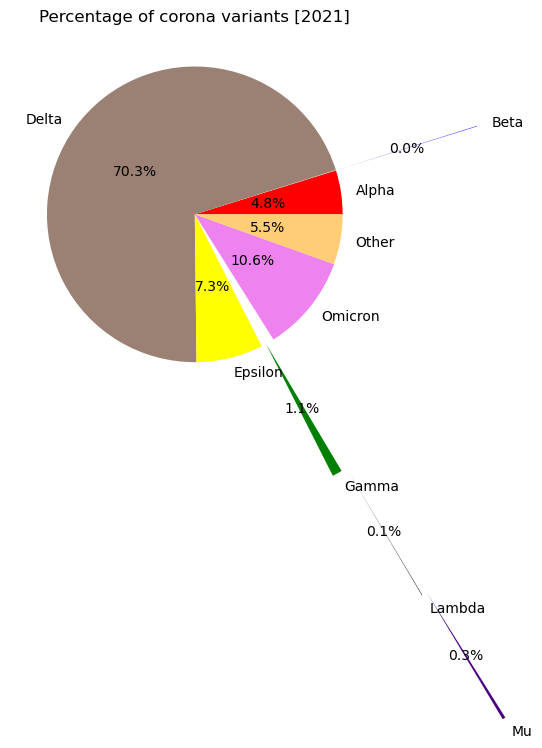

In [36]:
plt.pie(v.specimens,labels=v.variant_name,autopct='%1.001f%%',explode=[0,1,0,0,1,2,3,0,0],startangle=0,colors=['red','blue','#9a8174','yellow','green','black','indigo','violet','#ffcd75','#113e21'],pctdistance=.5,radius=1,center=(0,5),normalize=True,labeldistance=1.1,)
plt.title('Percentage of corona variants [2021]')
plt.show()

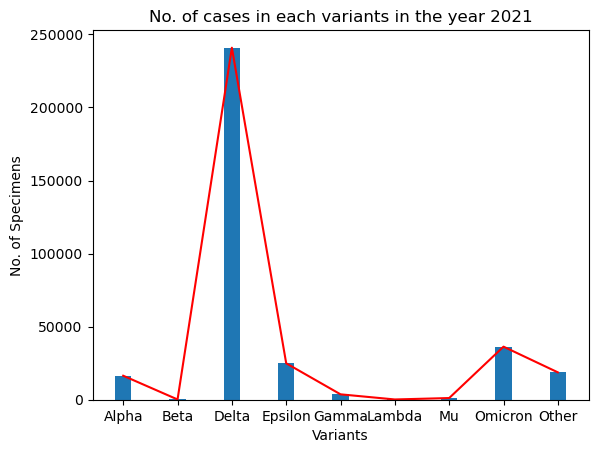

In [37]:
cpos=[c for c,df in df2.groupby(['variant_name'])]
plt.bar(cpos,v['specimens'],width=0.3)
plt.plot(cpos,v['specimens'],color='r')
plt.xticks(cpos)
plt.xlabel('Variants')
plt.ylabel('No. of Specimens')
plt.title('No. of cases in each variants in the year 2021')
plt.show()



In [38]:
df3=df1[df1.Year==2022]
df3

,variant_name,date,area,area_type,specimens,percentage,specimens_7d_avg,percentage_7d_avg,Year,Month,Monthandyear
1665,Delta,2022-01-01,California,State,37,6.19,164.428571,6.980411,2022,1,2022-01
1666,Omicron,2022-01-01,California,State,558,93.31,2176.571429,92.400995,2022,1,2022-01
1667,Other,2022-01-01,California,State,3,0.50,14.571429,0.618594,2022,1,2022-01
1668,Delta,2022-02-01,California,State,42,2.41,143.142857,6.151013,2022,2,2022-02
1669,Omicron,2022-02-01,California,State,1696,97.36,2169.428571,93.222836,2022,2,2022-02
...,...,...,...,...,...,...,...,...,...,...,...
2396,Omicron,2022-12-28,California,State,1329,99.70,916.571429,99.565487,2022,12,2022-12
2397,Other,2022-12-29,California,State,1,0.10,3.285714,0.367765,2022,12,2022-12
2398,Omicron,2022-12-29,California,State,995,99.90,890.142857,99.632235,2022,12,2022-12
2399,Omicron,2022-12-30,California,State,653,100.00,846.571429,99.630128,2022,12,2022-12


In [39]:
t=df3.groupby('variant_name').sum().reset_index()
t

,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg,Year,Month
0,Delta,733,45.07,1144.714286,55.979368,119298,233
1,Epsilon,2,0.24,0.285714,0.027970,4044,14
2,Gamma,10,1.24,2.285714,0.285425,14154,57
3,Omicron,334514,36240.13,338836.571427,36230.045640,738030,2382
4,Other,1647,213.35,1550.571429,188.921005,612666,1919


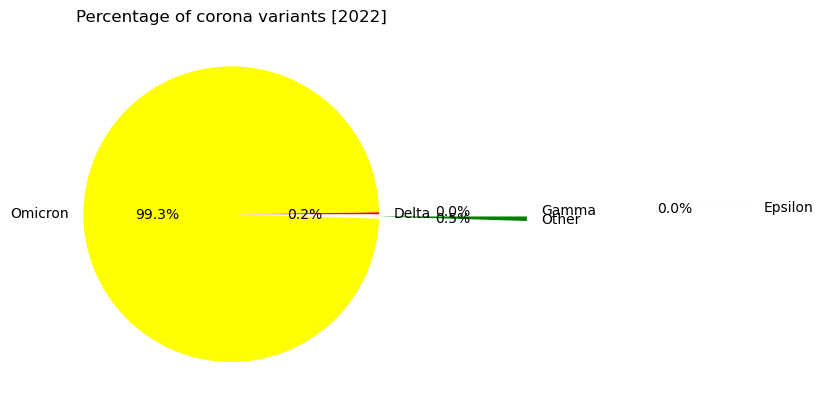

In [40]:
plt.pie(t.specimens,labels=t.variant_name,autopct='%1.00001f%%',explode=[0,2.5,1,0,1],startangle=0,colors=['red','blue','#9a8174','yellow','green'],pctdistance=.5,radius=1,center=(0,5),normalize=True,labeldistance=1.1,)
plt.title('Percentage of corona variants [2022]')
plt.show()

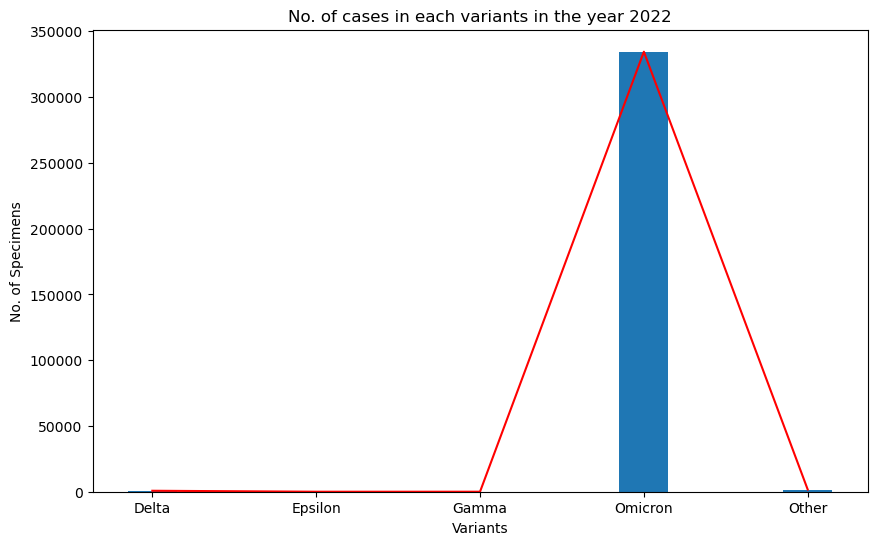

In [41]:
plt.figure(figsize=(10,6))
tpos=[s for s,df in df3.groupby(['variant_name'])]
plt.bar(tpos,t['specimens'],width=0.3)
plt.plot(tpos,t['specimens'],color='r')
plt.xticks(tpos)
plt.xlabel('Variants')
plt.ylabel('No. of Specimens')
plt.title('No. of cases in each variants in the year 2022')
plt.show()


In [42]:
df4=df1[df1.Year==2023]
df4

,variant_name,date,area,area_type,specimens,percentage,specimens_7d_avg,percentage_7d_avg,Year,Month,Monthandyear
2401,Omicron,2023-01-01,California,State,102,100.00,815.142857,99.650716,2023,1,2023-01
2402,Omicron,2023-02-01,California,State,711,99.86,759.000000,99.662352,2023,2,2023-02
2403,Other,2023-02-01,California,State,1,0.14,2.571429,0.337648,2023,2,2023-02
2404,Other,2023-03-01,California,State,5,0.60,1.571429,0.225410,2023,3,2023-03
2405,Omicron,2023-03-01,California,State,822,99.40,695.571429,99.774590,2023,3,2023-03
...,...,...,...,...,...,...,...,...,...,...,...
2477,Other,2023-02-16,California,State,1,0.68,2.000000,1.815824,2023,2,2023-02
2478,Other,2023-02-17,California,State,2,5.00,1.000000,1.051051,2023,2,2023-02
2479,Omicron,2023-02-17,California,State,38,95.00,94.142857,98.948949,2023,2,2023-02
2480,Omicron,2023-02-18,California,State,36,97.30,88.857143,98.730159,2023,2,2023-02


In [43]:
m=df4.groupby('variant_name').sum().reset_index()
m

,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg,Year,Month
0,Omicron,12293,4852.85,14382.571429,4858.423447,99127,187
1,Other,92,47.15,62.428571,27.503345,64736,129


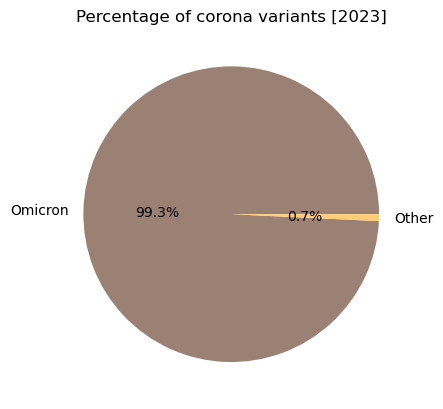

In [44]:
plt.pie(m.specimens,labels=m.variant_name,autopct='%1.001f%%',explode=[0,0],startangle=0,colors=['#9a8174','#ffcd75','#113e21'],pctdistance=.5,radius=1,center=(0,5),normalize=True,labeldistance=1.1,)
plt.title('Percentage of corona variants [2023]')
plt.show()

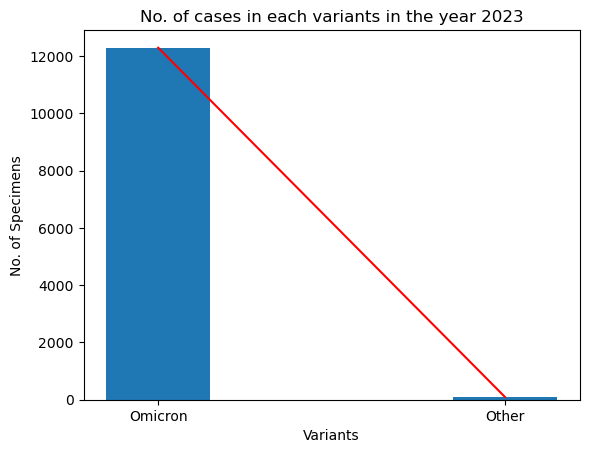

In [45]:
mpos=[j for j,df in df4.groupby(['variant_name'])]
plt.bar(mpos,m['specimens'],width=0.3)
plt.plot(mpos,m['specimens'],color='r')
plt.xticks(mpos)
plt.xlabel('Variants')
plt.ylabel('No. of Specimens')
plt.title('No. of cases in each variants in the year 2023')
plt.show()
